# SVM 

## 1. Data input

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import urllib3
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_absolute_error
from sklearn import metrics


df=pd.read_json('train.json')
df

,id,cuisine,ingredients
0,22675,italian,"[1% low-fat cottage cheese, low-fat marinara s..."
1,32288,southern_us,"[brown sugar, salt, eggs, butter, chopped peca..."
2,44406,thai,"[red chili peppers, bell pepper, garlic, fish ..."
3,29355,moroccan,"[water, green tea leaves, tangerine, fresh min..."
4,39350,chinese,"[vegetable oil, chile sauce, tomato paste, gar..."
...,...,...,...
29769,2278,japanese,"[soy sauce, sesame oil, garlic, sake, flour, g..."
29770,474,vietnamese,"[mint, garlic sauce, chinese chives, rice nood..."
29771,44229,indian,"[potatoes, vegetable broth, oil, cashew nuts, ..."
29772,20311,southern_us,"[butter, powdered sugar, cream cheese, soften,..."


<AxesSubplot:>

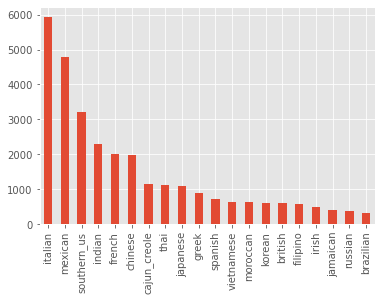

In [2]:
plt.style.use('ggplot')
df['cuisine'].value_counts().plot(kind='bar')

## 2. Data preprocessing 

In [3]:
from collections import Counter

In [4]:
features_all_list=[]
for i in df.ingredients:
    features_all_list+=i

features=list(set(features_all_list))
len(features)

6231

In [5]:
onehot_ingredients = np.zeros((df.shape[0], len(features)))
feature_lookup = sorted(features)

for index, row in df.iterrows():
    for ingredient in row['ingredients']:
        onehot_ingredients[index, feature_lookup.index(ingredient)] = 1
y = df.cuisine.values.reshape(-1,1)
y=y.ravel()

In [6]:
df_features = pd.DataFrame(onehot_ingredients)
d = {}
for i in range(len(features)):
    d[df_features.columns[i]] = features[i]
    
df_features = df_features.rename(columns=d)
df_features.shape

(29774, 6231)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df_features, y, test_size=0.3, shuffle=True)

## 3. Model construction

### model_svm_1: kernel用rbf

In [8]:
from sklearn.svm import SVC
model_svm_1=SVC(kernel='rbf')

In [9]:
model_svm_1.fit(X_train,y_train)

SVC()

### Results of model_svm_1 

In [10]:
y_true = y_test
y_pred = model_svm_1.predict(X_test)
con_matrix=pd.DataFrame(confusion_matrix(y_true,y_pred))
print(con_matrix)

    0   1    2    3   4    5    6    7   8     9   10   11   12    13   14  \
0   32   0    1    0   1    2    0    2   0    10   0    0    0    24    1   
1    0  33    0    0   0   29    0    3   6    31   0    2    0     3    0   
2    0   2  220    1   0   20    0    1   0    36   0    0    0    16    0   
3    0   1    0  490   4    3    0    1   0    17   0   14    9     7    0   
4    1   0    0   18  94    2    0    2   0    14   0    0    0    10    0   
5    0   2    4    1   0  334    1    3   8   177   0    0    0     0    1   
6    0   1    1    1   0    3  137    1   0    79   0    0    0     2    4   
7    1   0    0    1   2    5    3  636   0    16   2    0    0    30   12   
8    0  10    0    2   0   31    0    1  34    27   0    0    0     1    0   
9    0   0    4    1   0   82    9    3   2  1612   0    0    0    20    0   
10   0   1    2    3   5    4    0   14   0     2  61    0    0    12    0   
11   0   0    0   59   2   10    0   23   0    16   0  182    7 

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   brazilian       0.94      0.36      0.52        88
     british       0.63      0.19      0.29       178
cajun_creole       0.80      0.63      0.70       351
     chinese       0.71      0.84      0.77       586
    filipino       0.78      0.55      0.64       171
      french       0.53      0.57      0.55       590
       greek       0.88      0.57      0.69       241
      indian       0.85      0.87      0.86       731
       irish       0.64      0.21      0.32       160
     italian       0.69      0.91      0.78      1779
    jamaican       0.95      0.44      0.60       139
    japanese       0.87      0.57      0.69       318
      korean       0.83      0.60      0.70       172
     mexican       0.85      0.90      0.88      1408
    moroccan       0.84      0.59      0.70       191
     russian       0.79      0.21      0.34       108
 southern_us       0.60      0.79      0.69       980
     spanish       0.74    

### model_svm_2: kernel用poly (degree用默認的3)

In [12]:
model_svm_2=SVC(kernel='poly')

In [13]:
model_svm_2.fit(X_train,y_train)

SVC(kernel='poly')

### Results of model_svm_2 

In [14]:
y_true = y_test
y_pred = model_svm_2.predict(X_test)
con_matrix=pd.DataFrame(confusion_matrix(y_true,y_pred))
print(con_matrix)

    0   1    2    3   4    5   6    7   8     9   10  11  12    13  14  15  \
0    6   0    0    0   1    0   0    3   0    54   0   0   0    16   1   0   
1    0   9    1    0   0    9   1    0   2   105   0   0   0     0   0   1   
2    0   0  132    0   1    8   1    1   0   142   0   0   0    14   0   0   
3    0   1    0  379   2    0   0    1   0   173   0   6   4     5   0   1   
4    0   0    0   18  56    0   0    1   0    75   0   0   0    11   0   2   
5    0   0    3    1   0  125   0    1   0   415   0   0   0     0   0   0   
6    0   1    0    0   0    3  56    2   0   171   0   0   0     2   0   0   
7    0   2    0    1   4    0   0  467   0   191   0   0   0    48  10   0   
8    0   5    0    0   1    5   0    0  14    94   0   0   0     1   0   0   
9    0   0    0    1   0   24   3    2   0  1719   0   0   0     8   0   0   
10   0   1    1    5   1    1   0    8   0    57  33   0   0    12   0   0   
11   0   0    0   40   2    1   0   16   0   154   0  94   4    

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   brazilian       0.86      0.07      0.13        88
     british       0.41      0.05      0.09       178
cajun_creole       0.88      0.38      0.53       351
     chinese       0.70      0.65      0.67       586
    filipino       0.77      0.33      0.46       171
      french       0.57      0.21      0.31       590
       greek       0.88      0.23      0.37       241
      indian       0.88      0.64      0.74       731
       irish       0.82      0.09      0.16       160
     italian       0.37      0.97      0.53      1779
    jamaican       0.94      0.24      0.38       139
    japanese       0.87      0.30      0.44       318
      korean       0.86      0.33      0.48       172
     mexican       0.83      0.76      0.79      1408
    moroccan       0.81      0.34      0.47       191
     russian       0.69      0.08      0.15       108
 southern_us       0.61      0.51      0.55       980
     spanish       0.75    

## 5. Comparison & conclusion 

### model_svm_1(kernel=rbf)的準確率為0.73，model_svm_2(kernel=poly)的準確率為0.56。 